## Machine Learning Sederhana

### Import & Open Database Table

In [184]:
# Mengimport library/tools yang di perlukan
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pymysql
from getpass import getpass
import warnings
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Mengabaikan Peringatan yang tidak penting
warnings.filterwarnings('ignore')

# Membuat Izin Akses supaya tetap menjaga keamanan Database
user = getpass('user : ')
host = getpass('host : ')
password = getpass('password : ')
database = getpass('database : ')

# Membuat Koneksi jika Akses di berikan
connection = pymysql.connect(
    user = user,
    host = host,
    password = password,
    database = database
)

# Membuat Query untuk Memperlihatkan Seluruh Tabel di dalam DataBase
query1 = 'SELECT * FROM review1'
query2 = 'SELECT * FROM review2'

# Akses Tabel ke-1
review1 = pd.read_sql(query1,connection)
last_number = review1.iloc[-1,0]

# Akses Tabel ke-2
review2 = pd.read_sql(query2,connection)
review2['index'] = review2['index'] + last_number

# Menggabungkan Kedua Tabel & Memodifikasi Tabel
data = pd.concat([review1, review2], axis=0)
data = data.rename(columns={'index':'No'})
data = data.set_index('No')
data['id'] = data['id'].astype('str').astype('str') 

## Assessing Data

### Mengumpulkan & Menghapus Data yang tidak diperlukan

In [185]:
data = data.drop(columns=['Age','id'])

In [186]:
data

,Gender,Customer Type,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
No,,,,,,,,,,,,,,,,,,,,,
0,Female,Loyal Customer,Middle-aged Adults,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,Young Adults,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,Young Adults,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,Middle-aged Adults,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,Middle-aged Adults,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,Male,disloyal Customer,Young Adults,Business travel,Business,280,2,5,2,3,...,3,3,2,5,5,4,3,0,0.0,neutral or dissatisfied
39997,Female,Loyal Customer,Elderly,Business travel,Business,2987,1,1,1,1,...,4,4,4,4,4,4,3,0,9.0,satisfied
39998,Female,disloyal Customer,Young Adults,Business travel,Eco,1124,1,1,1,4,...,4,2,2,3,3,4,4,0,0.0,neutral or dissatisfied


In [187]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age_Category                         0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure_Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [188]:
data.duplicated().sum()

0

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39886 entries, 0 to 40000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             39886 non-null  object 
 1   Customer Type                      39886 non-null  object 
 2   Age_Category                       39886 non-null  object 
 3   Type of Travel                     39886 non-null  object 
 4   Class                              39886 non-null  object 
 5   Flight Distance                    39886 non-null  int64  
 6   Inflight wifi service              39886 non-null  int64  
 7   Departure_Arrival time convenient  39886 non-null  int64  
 8   Ease of Online booking             39886 non-null  int64  
 9   Gate location                      39886 non-null  int64  
 10  Food and drink                     39886 non-null  int64  
 11  Online boarding                    39886 non-null  int64  


In [190]:
data.describe()

,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000,39886.000000
mean,1193.995387,2.727724,3.051722,2.756857,2.970165,3.213709,3.255252,3.442887,3.360126,3.381412,3.344030,3.631349,3.305220,3.644086,3.288522,14.528983,14.985333
std,1001.718890,1.331456,1.530815,1.403590,1.283061,1.329658,1.347898,1.316441,1.332416,1.286048,1.315296,1.178102,1.268891,1.178784,1.314099,37.213417,37.647106
min,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


## Exploratory Data Analysis (EDA)

### Melakukan Encoding & Normalisasi Data

In [191]:
# Menyalin Data
df = data.copy()

# Pilih Kolom yang di normalisasikan
pilihkolom = ['Gender', 'Customer Type', 'Age_Category', 'Type of Travel', 'Class']

# Melakukan one-hot encoding Terhadap Data Kategori
encod = LabelEncoder()

# Melakukan label encoding pada kolom-kolom yang dipilih
for kolom in pilihkolom:
    df[kolom] = encod.fit_transform(df[kolom])

# Melihat hasil encoding
df

,Gender,Customer Type,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
No,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,0,0,4,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,1,1,4,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,1,0,2,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,0,0,2,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,1,1,4,0,0,280,2,5,2,3,...,3,3,2,5,5,4,3,0,0.0,neutral or dissatisfied
39997,0,0,1,0,0,2987,1,1,1,1,...,4,4,4,4,4,4,3,0,9.0,satisfied
39998,0,1,4,0,1,1124,1,1,1,4,...,4,2,2,3,3,4,4,0,0.0,neutral or dissatisfied


In [192]:
# Pilih Kolom yang di normalisasikan
normalkolom = ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

# Melakukan normalisasi Jarak Umur, Jarak Penerbangan, & Delay
normalisasi = MinMaxScaler()
df[normalkolom] = normalisasi.fit_transform(df[normalkolom])
df

,Gender,Customer Type,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
No,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,0.026050,5,4,3,4,...,5,5,5,5,2,5,5,0.038314,0.034375,satisfied
1,0,0,4,0,0,0.571890,1,1,3,1,...,4,4,4,4,3,4,5,0.000000,0.000000,satisfied
2,1,1,4,0,1,0.032512,2,0,2,4,...,2,4,1,3,2,2,2,0.000000,0.000000,neutral or dissatisfied
3,1,0,2,0,0,0.675687,0,0,0,2,...,1,1,1,1,3,1,4,0.000000,0.004688,satisfied
4,0,0,2,0,1,0.232431,2,3,4,3,...,2,2,2,2,4,2,4,0.000000,0.015625,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39996,1,1,4,0,0,0.050283,2,5,2,3,...,3,3,2,5,5,4,3,0.000000,0.000000,neutral or dissatisfied
39997,0,0,1,0,0,0.596931,1,1,1,1,...,4,4,4,4,4,4,3,0.000000,0.007031,satisfied
39998,0,1,4,0,1,0.220719,1,1,1,4,...,4,2,2,3,3,4,4,0.000000,0.000000,neutral or dissatisfied


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39886 entries, 0 to 40000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             39886 non-null  int32  
 1   Customer Type                      39886 non-null  int32  
 2   Age_Category                       39886 non-null  int32  
 3   Type of Travel                     39886 non-null  int32  
 4   Class                              39886 non-null  int32  
 5   Flight Distance                    39886 non-null  float64
 6   Inflight wifi service              39886 non-null  int64  
 7   Departure_Arrival time convenient  39886 non-null  int64  
 8   Ease of Online booking             39886 non-null  int64  
 9   Gate location                      39886 non-null  int64  
 10  Food and drink                     39886 non-null  int64  
 11  Online boarding                    39886 non-null  int64  


### Melihat Distribusi Data

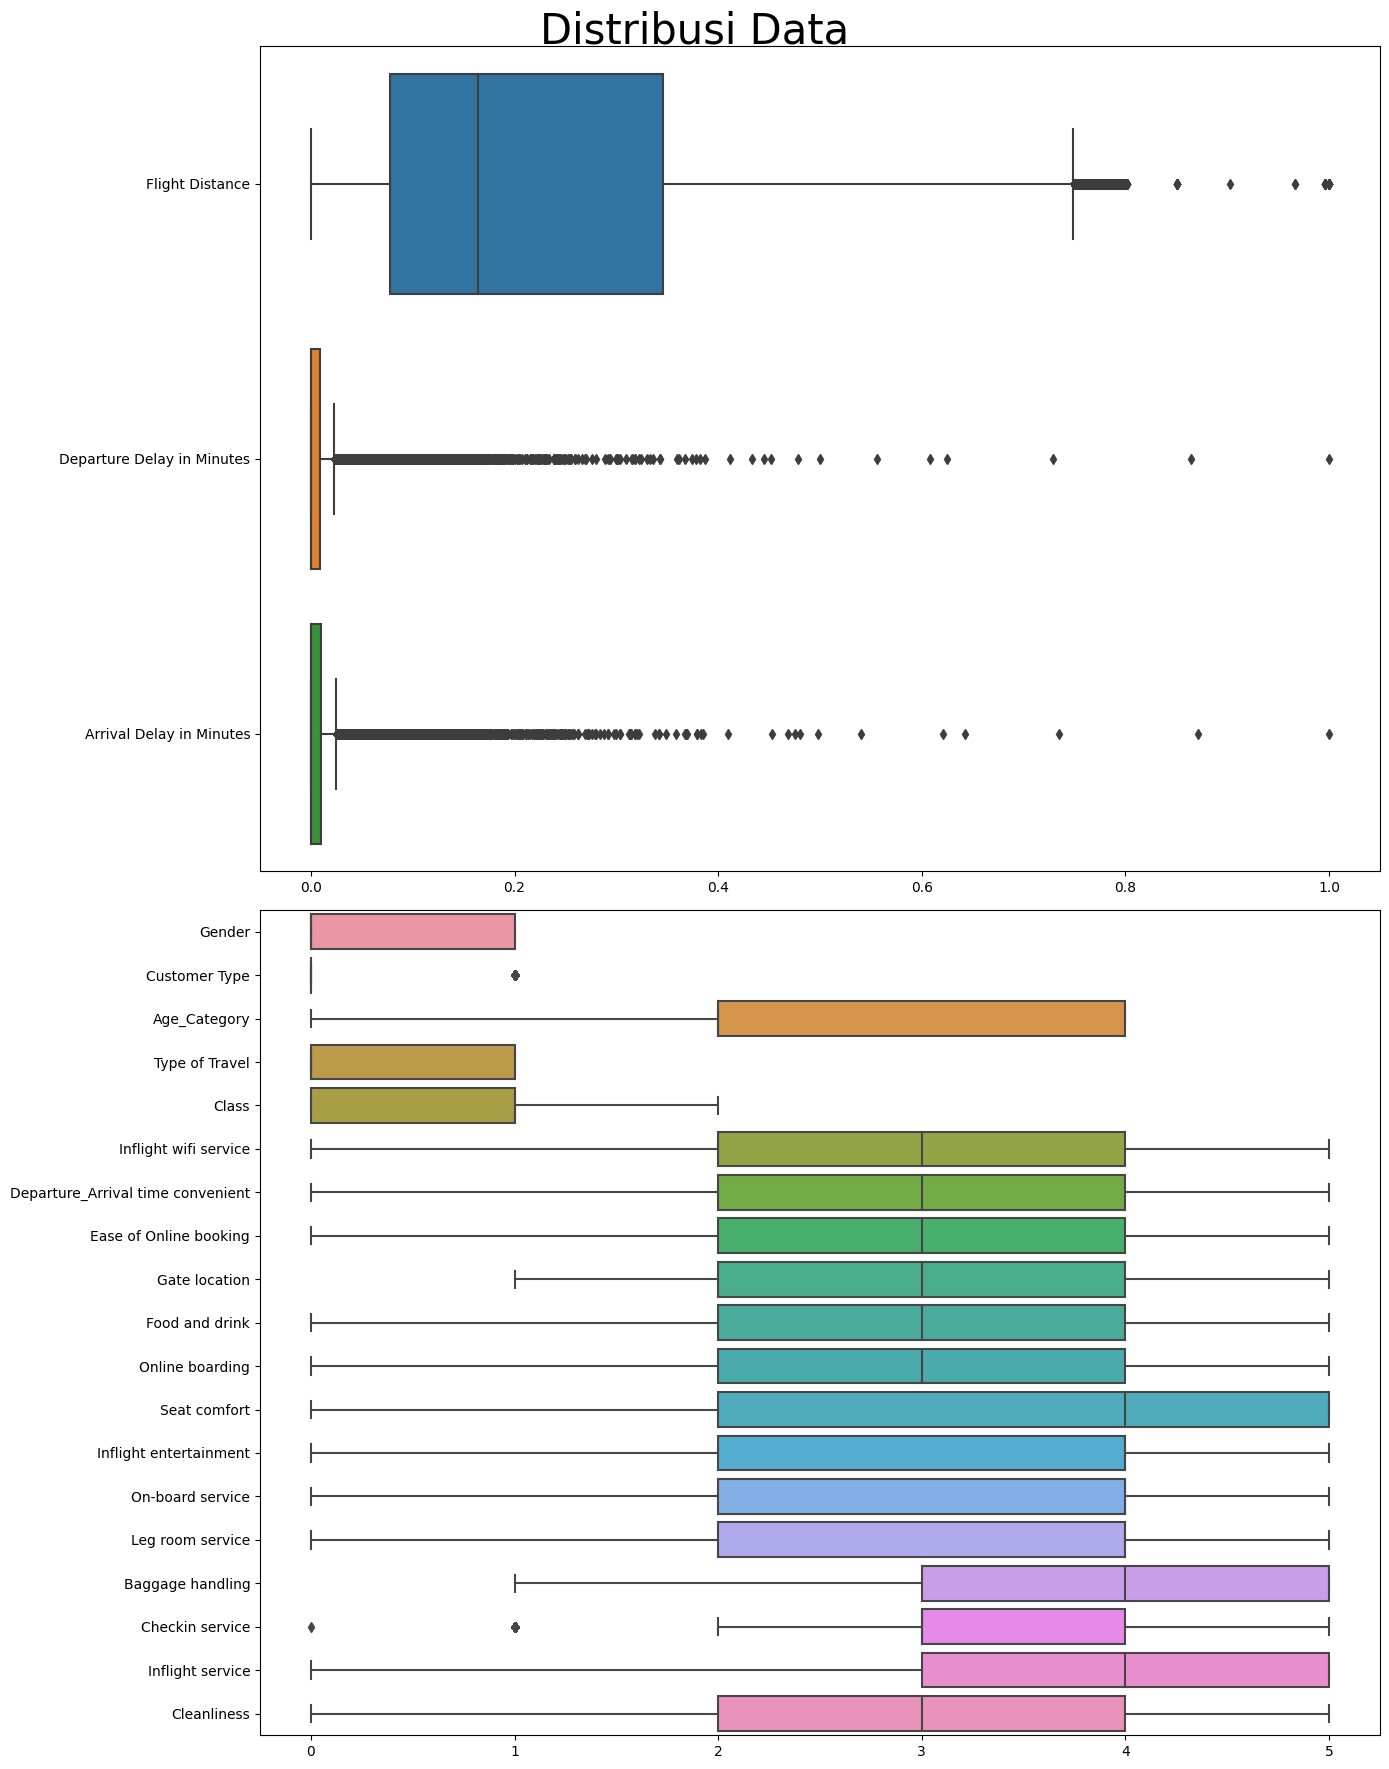

In [194]:
def distribusi_data():
    # Membuat Canvas
    fig, axes = plt.subplots(2,1,figsize=[14,18])

    # canvas ke-1
    pilihanlabel1 = df.iloc[:,[5,20,21]]
    axes[0] = sns.boxplot(data=pilihanlabel1, orient='h', ax=axes[0])

    # canvas ke-2
    pilihanlabel2 = df.iloc[:,[a for a in range(0,22) if a not in[5,20,21]]]
    axes[1] = sns.boxplot(data=pilihanlabel2, orient='h', ax=axes[1])

    # Memvisualisasikan Data
    fig.suptitle('Distribusi Data', fontsize= 30)
    plt.tight_layout()
    plt.show()

distribusi_data()

### Melihat Korelasi Data

In [195]:
df.corr(numeric_only=True)

,Gender,Customer Type,Age_Category,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure_Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender,1.000000,-0.030452,-0.011017,0.011544,-0.011200,-0.000182,0.000882,0.008914,0.002227,0.001792,...,-0.039007,0.003969,0.003946,0.034429,0.039830,0.004299,0.040842,0.000462,0.009391,0.007754
Customer Type,-0.030452,1.000000,0.313317,-0.307242,0.042372,-0.230655,-0.004447,-0.213045,-0.017537,0.001318,...,-0.151998,-0.100665,-0.049462,-0.045749,0.030031,-0.029291,0.025075,-0.079840,0.000167,0.000163
Age_Category,-0.011017,0.313317,1.000000,-0.173548,-0.019310,-0.040336,0.006880,-0.082179,0.013609,0.010605,...,-0.088306,-0.021623,-0.030841,-0.023244,0.029789,-0.035075,0.033029,-0.012760,0.004273,0.005545
Type of Travel,0.011544,-0.307242,-0.173548,1.000000,0.482272,-0.267922,-0.107819,0.254925,-0.133541,-0.029845,...,-0.132951,-0.163575,-0.065597,-0.145606,-0.039414,0.018269,-0.027994,-0.093910,-0.010827,-0.009546
Class,-0.011200,0.042372,-0.019310,0.482272,1.000000,-0.430456,-0.024200,0.082998,-0.096391,-0.009642,...,-0.207875,-0.188177,-0.221202,-0.205371,-0.173926,-0.155600,-0.164115,-0.132186,0.005451,0.009142
Flight Distance,-0.000182,-0.230655,-0.040336,-0.267922,-0.430456,1.000000,0.002925,-0.015302,0.064044,0.010557,...,0.152750,0.134624,0.115365,0.134032,0.066673,0.071340,0.063629,0.099011,0.005535,0.003001
Inflight wifi service,0.000882,-0.004447,0.006880,-0.107819,-0.024200,0.002925,1.000000,0.339750,0.706896,0.337525,...,0.120495,0.203213,0.112469,0.157170,0.116961,0.040346,0.107170,0.127883,-0.011141,-0.012873
Departure_Arrival time convenient,0.008914,-0.213045,-0.082179,0.254925,0.082998,-0.015302,0.339750,1.000000,0.435815,0.454441,...,0.000514,-0.019040,0.061921,0.006852,0.064055,0.081799,0.065598,-0.000564,0.001465,0.000060
Ease of Online booking,0.002227,-0.017537,0.013609,-0.133541,-0.096391,0.064044,0.706896,0.435815,1.000000,0.461581,...,0.023951,0.041915,0.036279,0.112183,0.040405,0.002520,0.037116,0.009788,-0.002305,-0.004593
Gate location,0.001792,0.001318,0.010605,-0.029845,-0.009642,0.010557,0.337525,0.454441,0.461581,1.000000,...,-0.007585,-0.002602,-0.029236,-0.006026,0.000519,-0.048199,0.001350,-0.017006,0.003821,0.002647


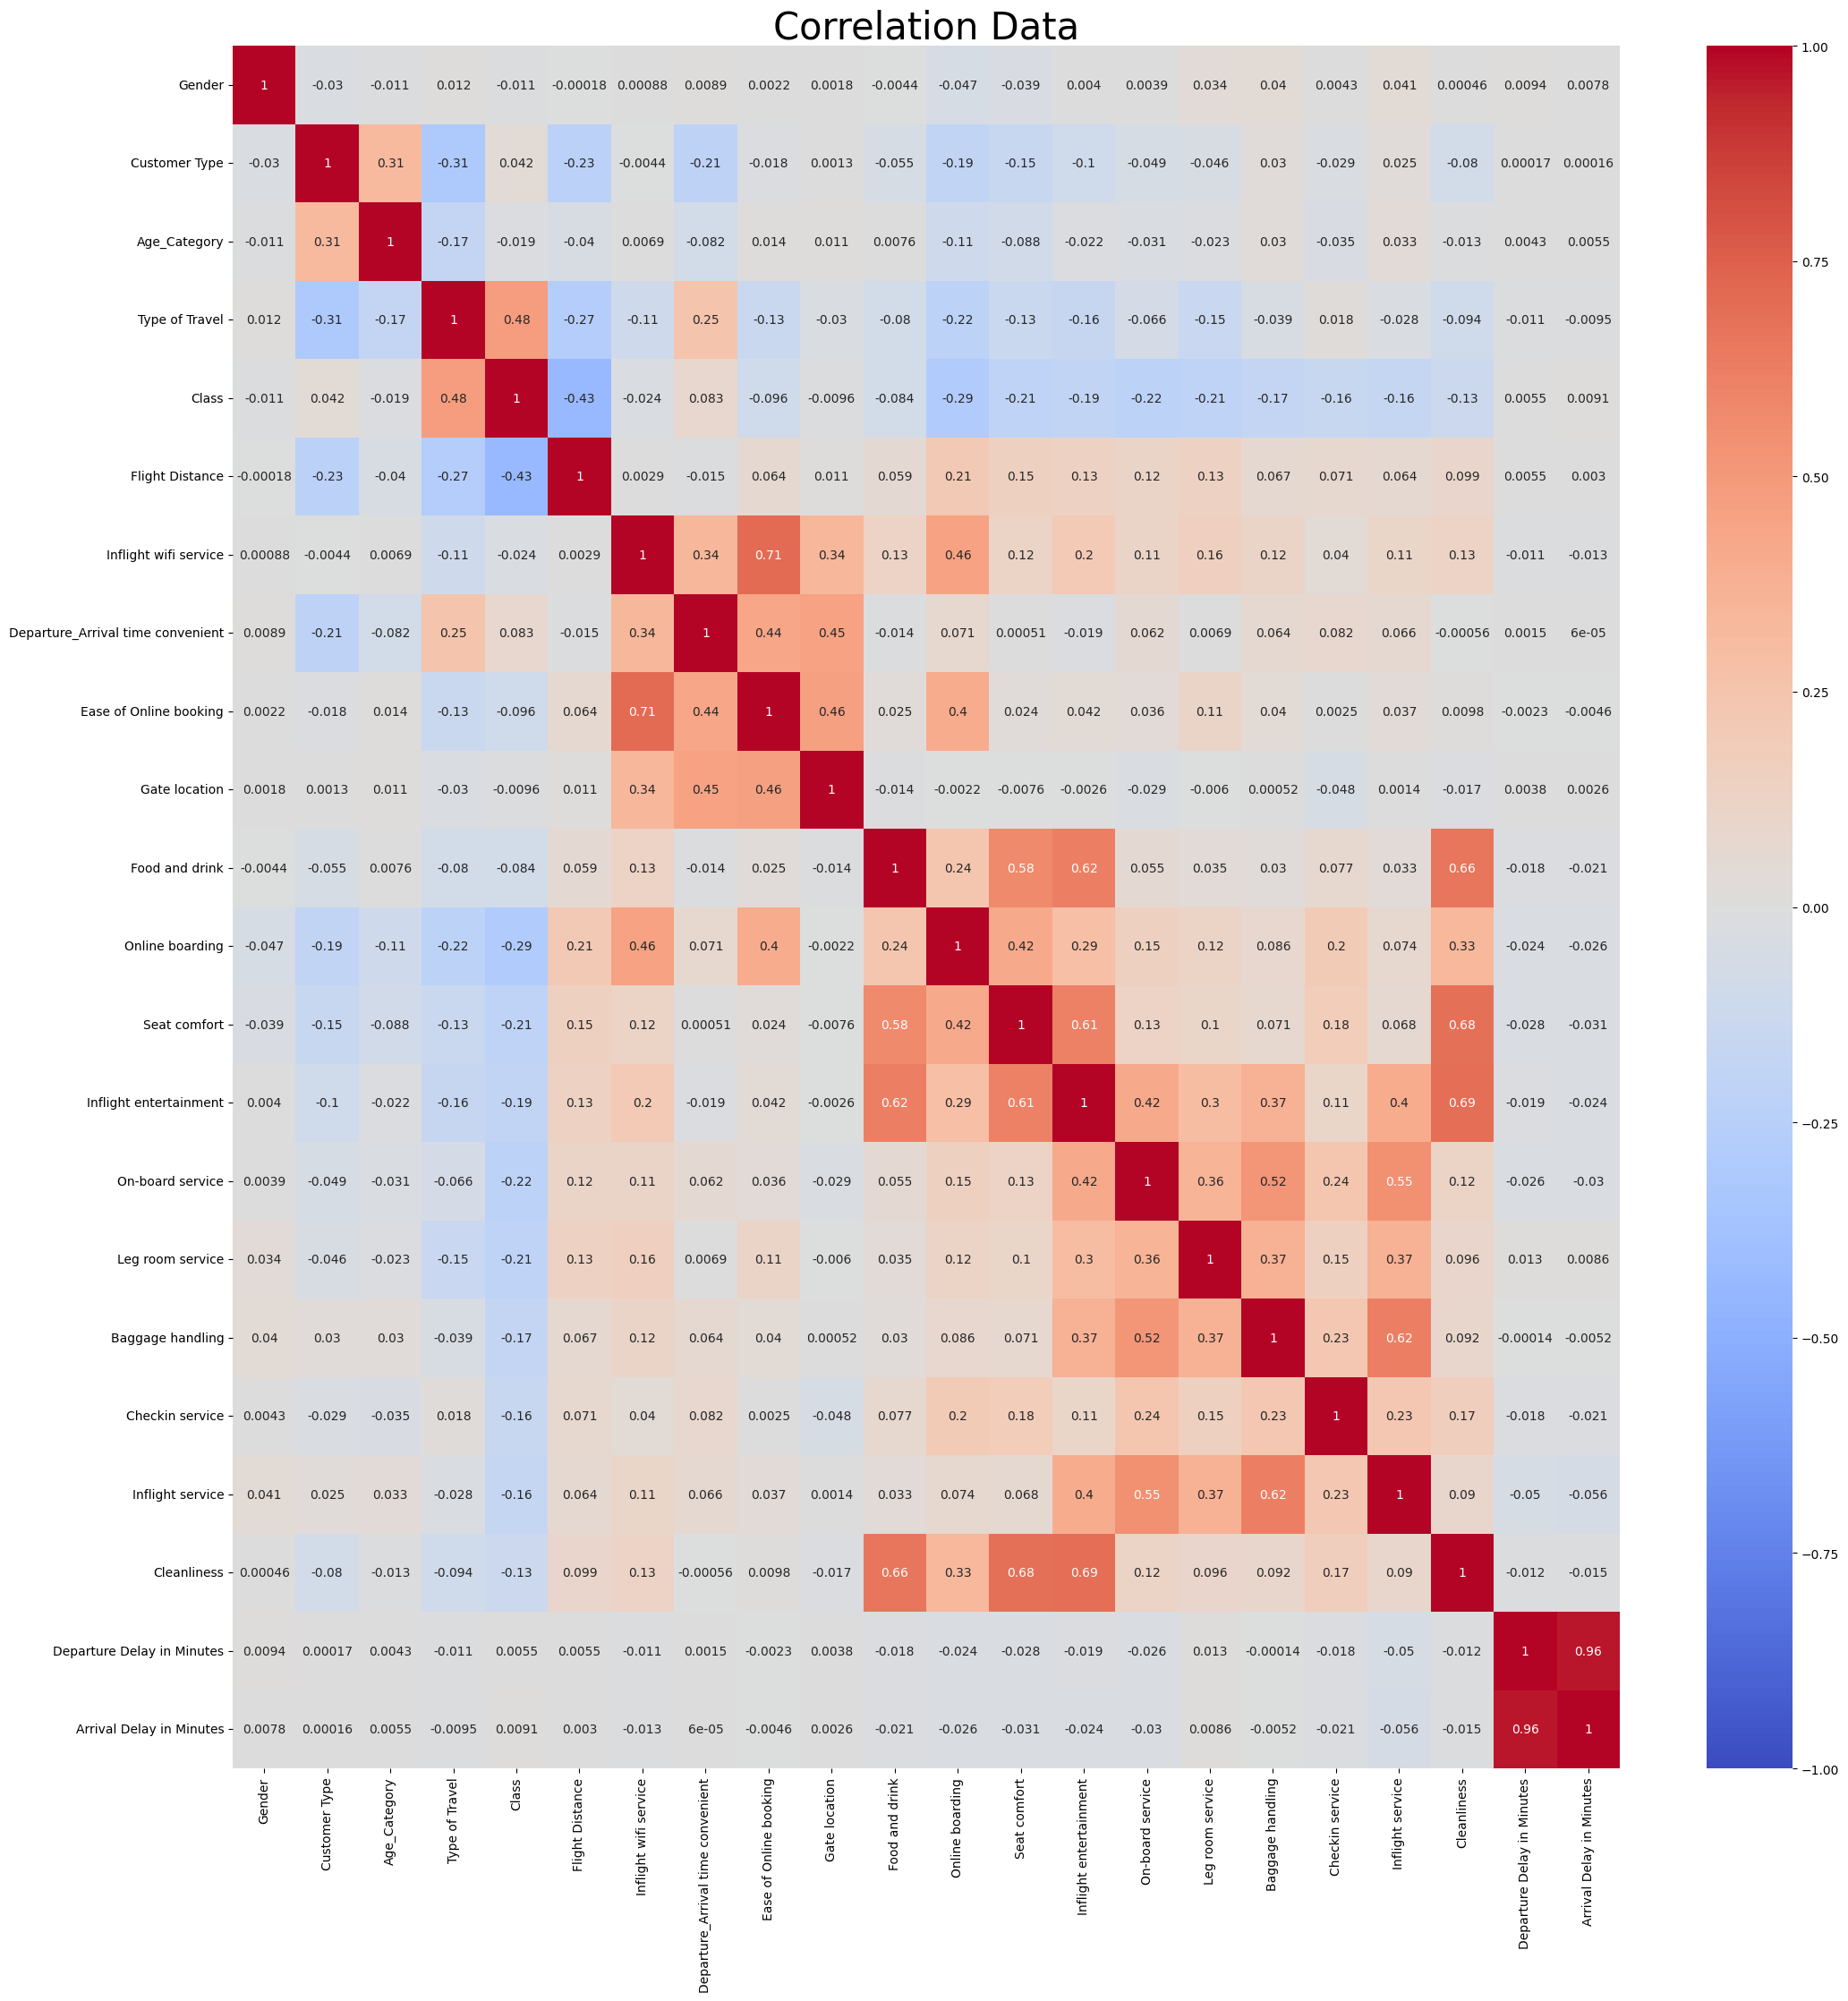

In [196]:
def correlation_data():
    # Memvisualisasikan Data Korelasi
    plt.figure(figsize=[25,25])
    sns.heatmap(data=df.corr(numeric_only=True),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Data',fontsize=30)
    plt.show()

correlation_data()

## Preprocessing Machine Learning

### Pemilihan Fitur Machine Learning

In [197]:
# Pisahkan fitur dan target
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Menyeleksi Fitur terbaik
fitur = SelectKBest(chi2)
select_X = fitur.fit_transform(X,y)

# Melihat Hasil
select_X

array([[0., 0., 1., ..., 5., 5., 5.],
       [0., 0., 0., ..., 4., 4., 5.],
       [1., 0., 1., ..., 4., 1., 2.],
       ...,
       [1., 0., 1., ..., 2., 2., 4.],
       [0., 0., 0., ..., 5., 5., 3.],
       [0., 0., 0., ..., 4., 4., 4.]])

In [198]:
# Mendapatkan Indeks / Mask dari fitur yang sudah di seleksi
cek_indeks =  fitur.get_support(indices= True)

# Memasukkan indeksnya ke dalam DataFrame
cek_tabel = X.columns[cek_indeks]
cek = pd.DataFrame(select_X, columns= cek_tabel)
    
# Melihat hasilnya
cek

,Customer Type,Type of Travel,Class,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Cleanliness
0,0.0,0.0,1.0,5.0,4.0,3.0,5.0,5.0,5.0,5.0
1,0.0,0.0,0.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0
2,1.0,0.0,1.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0
3,0.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,1.0,4.0
4,0.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...
39881,1.0,0.0,0.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0
39882,0.0,0.0,0.0,1.0,4.0,5.0,4.0,4.0,4.0,3.0
39883,1.0,0.0,1.0,1.0,1.0,4.0,4.0,2.0,2.0,4.0
39884,0.0,0.0,0.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0


### Note Untuk Definisi Data yang sebelumnya dari Kategori Seleksi Fitur

In [199]:
# Customer Type:
    # 0 = Loyal Customer
    # 1 = disloyal Customer
    
# Type of Travel
    # 0 = Business travel
    # 1 = Personal Travel

# Class
    # 0 = Business
    # 1 = Eco
    # 2 = Eco Plus

### Mengecek Akurasi Fitur yang sudah di Seleksi

In [200]:
def measurement_feature():
    # Melakukan Pengukuran Fitur
    ukur = RandomForestClassifier()
    ukur.fit(X,y)

    # Melihat hasil feature importance
    feature_importance = ukur.feature_importances_
    return(feature_importance)

measurement_feature()

array([0.00561867, 0.03311387, 0.01333505, 0.09136027, 0.10772086,
       0.04001021, 0.14971533, 0.01857129, 0.04008152, 0.01716667,
       0.01334883, 0.16023011, 0.04926379, 0.05643558, 0.03154143,
       0.04401891, 0.02475344, 0.02512446, 0.024013  , 0.02697379,
       0.01330645, 0.01429647])

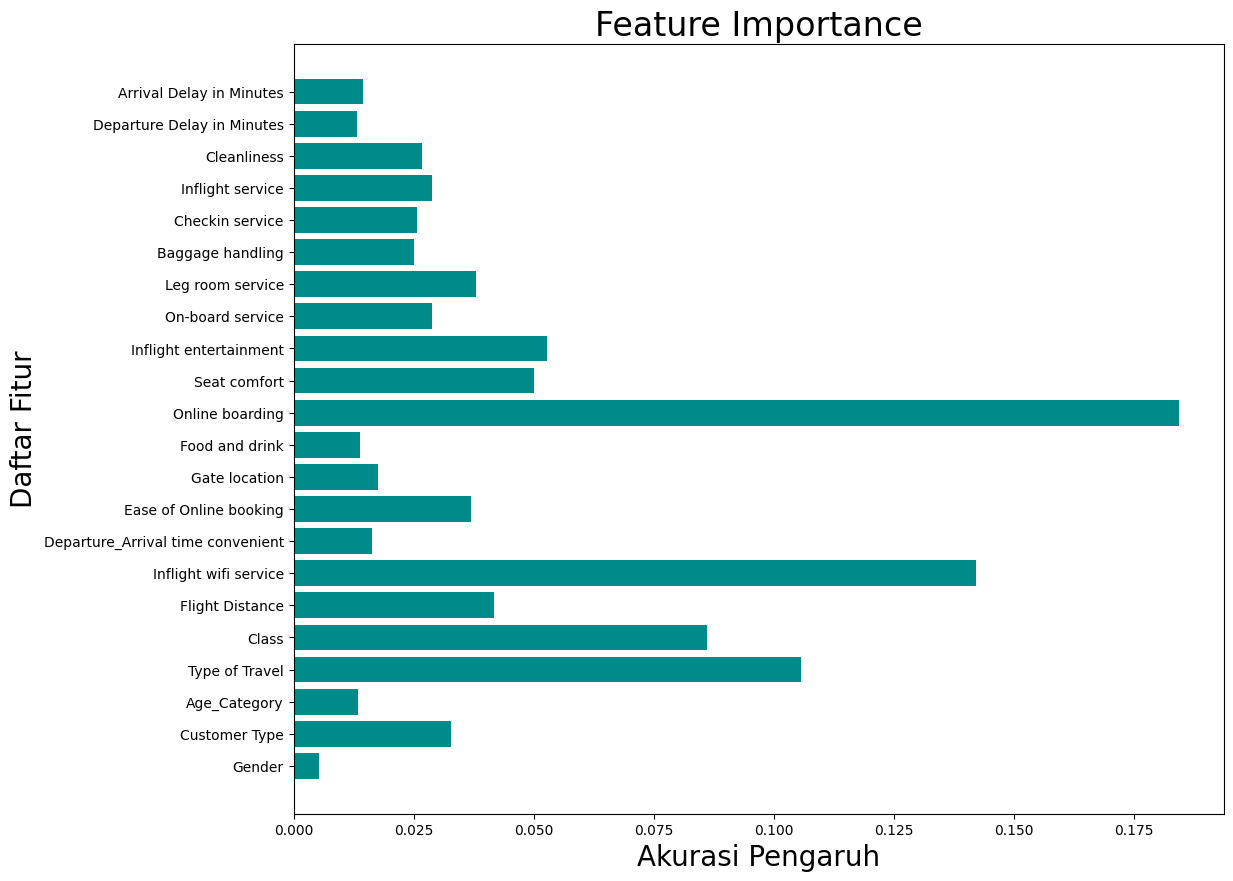

In [201]:
def visual_ukuran_feature_importance():
    # Membuat Data Berbentuk Series
    visual = pd.Series(measurement_feature(), X.columns)
    
    # Membuat Diagram Batang Horizontal
    plt.figure(figsize=[12,10])
    plt.barh(y= visual.index, width= visual.values, color= 'darkcyan')
    
    # Membuat Informasi Tambahan
    plt.ylabel('Daftar Fitur', fontsize= 20)
    plt.xlabel('Akurasi Pengaruh', fontsize= 20)
    plt.title('Feature Importance', fontsize= 24)

    # Memvisualisasikan Hasilnya
    plt.show()

visual_ukuran_feature_importance()

## Machine Learning Model

### Model ke-1 Menggunakan Model Tetangga

In [202]:
# Melakukan Update pada Fitur yang sudah di Seleksi
X = select_X

# Melakukan Pelatihan & Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 50)

# Membuat Model Machine Learning
model1 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
y_pred1

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'satisfied'], dtype=object)

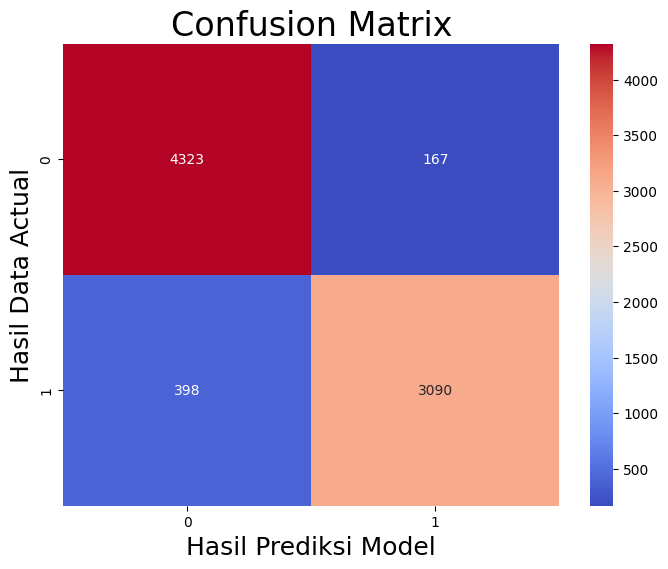

In [203]:
# Menghitung confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Hasil Prediksi Model', fontsize= 18)
plt.ylabel('Hasil Data Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [204]:
# Menghitung metrik evaluasi Model KNeighborsClassifier
evaluasi1 = classification_report(y_test, y_pred1)
print(f'Accuracy Score Model KNeighborsClassifier: {accuracy_score(y_test, y_pred1)}\n')
print(evaluasi1)

Accuracy Score Model KNeighborsClassifier: 0.929180245675608

                         precision    recall  f1-score   support

neutral or dissatisfied       0.92      0.96      0.94      4490
              satisfied       0.95      0.89      0.92      3488

               accuracy                           0.93      7978
              macro avg       0.93      0.92      0.93      7978
           weighted avg       0.93      0.93      0.93      7978



### Model ke-2 Menggunakan Model Random Forest

In [205]:
# Membuat Model Machine Learning
model2 = RandomForestClassifier()
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
y_pred2

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

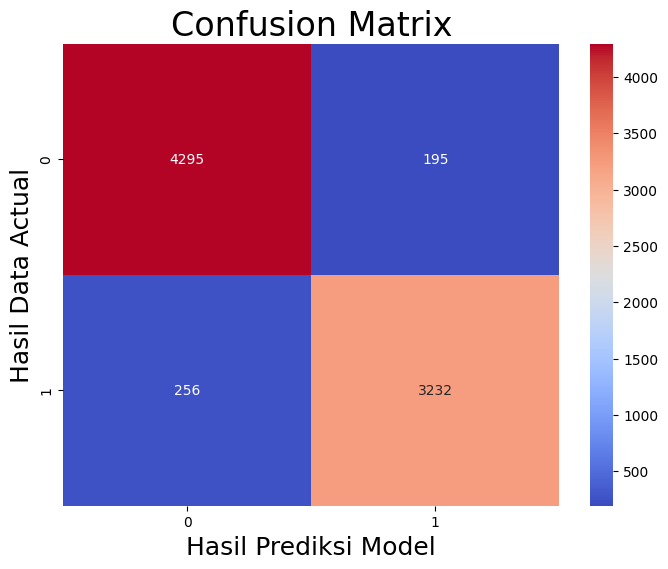

In [206]:
# Menghitung confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Hasil Prediksi Model', fontsize= 18)
plt.ylabel('Hasil Data Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [207]:
# Menghitung metrik evaluasi Model RandomForestClassifier
evaluasi2 = classification_report(y_test, y_pred2)
print(f'Accuracy Score Model RandomForestClassifier: {accuracy_score(y_test, y_pred2)}\n')
print(evaluasi2)

Accuracy Score Model RandomForestClassifier: 0.9434695412384057

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95      4490
              satisfied       0.94      0.93      0.93      3488

               accuracy                           0.94      7978
              macro avg       0.94      0.94      0.94      7978
           weighted avg       0.94      0.94      0.94      7978



### Model ke-3 Menggunakan Model Decision Tree

In [208]:
# Membuat Model Machine Learning
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)
y_pred3 = model3.predict(X_test)
y_pred3

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

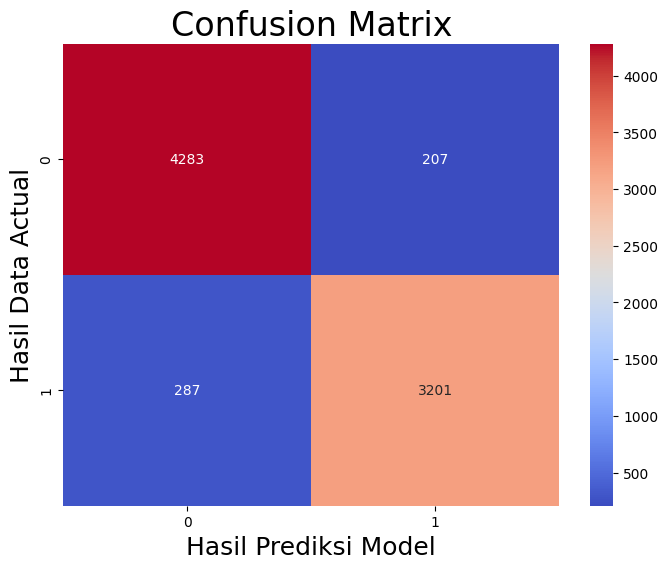

In [209]:
# Menghitung confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Hasil Prediksi Model', fontsize= 18)
plt.ylabel('Hasil Data Actual', fontsize= 18)
plt.title('Confusion Matrix', fontsize= 24)
plt.show()

In [210]:
# Menghitung metrik evaluasi Model DecisionTreeClassifier
evaluasi3 = classification_report(y_test, y_pred3)
print(f'Accuracy Score Model DecisionTreeClassifier: {accuracy_score(y_test, y_pred3)}\n')
print(evaluasi3)

Accuracy Score Model DecisionTreeClassifier: 0.9380797192278767

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.95      4490
              satisfied       0.94      0.92      0.93      3488

               accuracy                           0.94      7978
              macro avg       0.94      0.94      0.94      7978
           weighted avg       0.94      0.94      0.94      7978



### Membuat Sistem Prediksi

Note Untuk Definisi Data yang sebelumnya dari Kategori Seleksi Fitur

In [211]:
# Customer Type:
    # 0 = Loyal Customer
    # 1 = disloyal Customer
    
# Type of Travel
    # 0 = Business travel
    # 1 = Personal Travel

# Class
    # 0 = Business
    # 1 = Eco
    # 2 = Eco Plus

In [212]:
def tes_prediction():
    # Membuat Data Baru
    inputan = np.array(
    [   [1.0, 0.0, 2.0, 4.0, 4.0, 3.0, 4.0 ,2.0 ,5.0 ,3.0],
        [0.0, 1.0, 1.0, 5.0, 3.0, 4.0, 4.0, 3.0, 4.0, 5.0],
        [1.0, 1.0, 2.0, 3.0, 3.0, 5.0, 2.0, 2.0, 3.0, 1.0],
        [1.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 1.0, 5.0, 2.0],
        [0.0, 1.0, 0.0, 5.0, 1.0, 2.0, 2.0, 4.0, 5.0, 4.0],
    ])
    # Memodifikasi Bentuk Array Data Baru menjadi 5 baris + 10 kolom
    inputan = inputan.reshape(5,10)

    # Melakukan tes Prediksi
    prediksi1 = model1.predict(inputan)
    prediksi2 = model2.predict(inputan)
    prediksi3 = model3.predict(inputan)

    # Mengeluarkan Output masing-masing model
    print(f'Hasil Prediksi KNeighborsClassifier Data Baru')
    print(f'{prediksi1}\n')

    print(f'Hasil Prediksi RandomForestClassifier Data Baru')
    print(f'{prediksi2}\n')

    print(f'Hasil Prediksi DecisionTreeClassifier Data Baru')
    print(f'{prediksi3}\n')

if __name__ == '__main__':
    tes_prediction()

Hasil Prediksi KNeighborsClassifier Data Baru
['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied']

Hasil Prediksi RandomForestClassifier Data Baru
['neutral or dissatisfied' 'satisfied' 'neutral or dissatisfied'
 'satisfied' 'satisfied']

Hasil Prediksi DecisionTreeClassifier Data Baru
['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied' 'satisfied']

